[Tensorflow Hub](https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2)

In [1]:
## importing required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2 

import warnings
warnings.filterwarnings('ignore')
from  PIL import Image

random.seed(23)

In [2]:
## installing tensorflow_hub library
!pip install tensorflow_hub

In [3]:
## Loading the tensforflow hub fast arbitrary image style transfer module
import tensorflow_hub as hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [4]:
## getting the content and style image paths
style_img_path = "./Images/Style_Image.jpeg"
content_img_path = "./Images/Content_Image.jpeg"

In [5]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return Image.fromarray(tensor)

***Content Image***

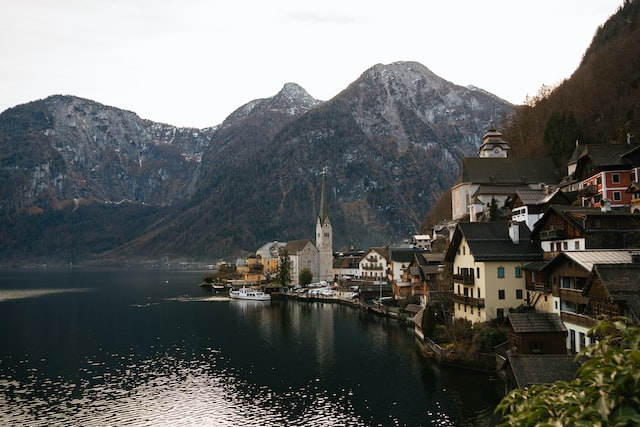

***Style Images***

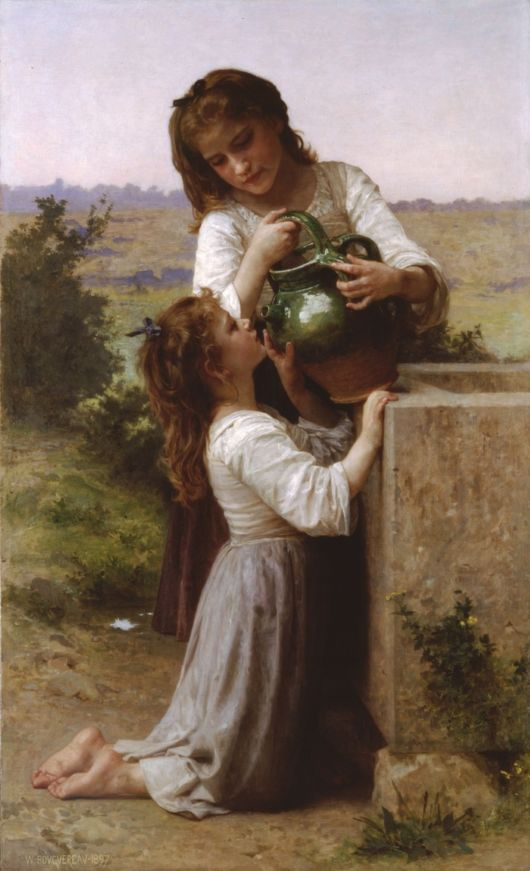

In [6]:
## reading the content and style images
content_image = plt.imread(content_img_path)
style_image = plt.imread(style_img_path)

In [7]:
## convert to float32 numpy array, add batch dimension, and normalize to range[0,1]
content_image = content_image.astype(np.float32)[np.newaxis,...] / 255
style_image = style_image.astype(np.float32)[np.newaxis,...] / 255

In [8]:
## resizing style image
style_image = tf.image.resize(style_image, (256,256))

In [9]:
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

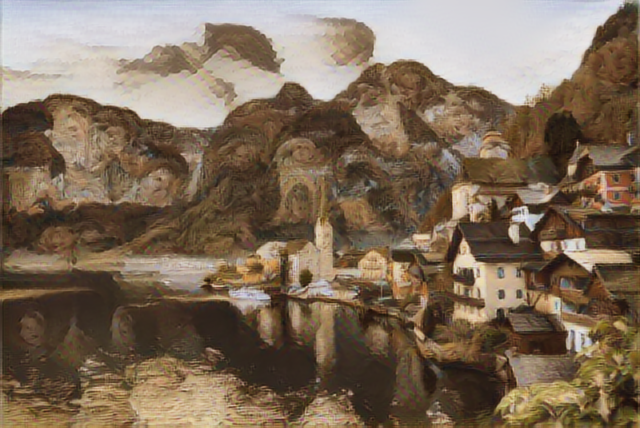

In [10]:
tensor_to_image(stylized_image)